In [1]:
from os import listdir
from os.path import isfile, join
import os

In [2]:
def CleanMetaData():
    fileDirectory = 'Metadata/'
    listFiles = [f for f in listdir(fileDirectory) if isfile(join(fileDirectory, f))]
    for files in listFiles:
        if '.txt' in files:
            continue
        else:
            #print(fileDirectory + files)
            os.remove(fileDirectory + files)

#CleanMetaData()

In [3]:
def ReadTestSamples(testList, filePath):
    with open(filePath) as fp:
        line = fp.readline()
        while line:
            testList.append(line.strip())
            line = fp.readline()
    return testList

testList = []
testList = ReadTestSamples(testList, 'Normal.txt')
testList = ReadTestSamples(testList, 'Single.txt')

print(testList)

['39c85e85b12d286863f2eeac6e888ff6d1d9c52227e2c0048a983000e2fbee91', 'cansend', '98bd9e81e802e78c5c3c1d818e56433460205b79457c500c5f3bcd4fa95da797', 'mountpoint', 'b532e293aaedd3987c7896e690a7d9b11fd2c4ab0896cdd301ef0df28a4d1766', 'b30ea70288adc39d72efa78c7ce6b6aa', 'isotpsend', '9d3f43a1a062fa0cb7fc95575d23bfa3d262b71efd6c45c677b968f0acdbfc78', 'logname', 'loadkeys', 'bd1eb8689820921aa1d2b71f6fbc56f353b4c0a81fbf75cb5bd618f4477b6e01', 'canlogserver', 'c70cd2722625931cff55570cb33e5f857c9af34b8f960160c809fabcc5de028a', 'ssh-copy-id', '93f6d008b1ace583fc8fc3fb7978d771', 'ca55eb34747506e6dfa4afa03df6f910238a5f81c8f22cc2cdfce0dcf5254d9b', '67010f3cc452a801b68b512991725a0ed8558108a7d71fb7be083812379cf18b', 'arm-linux-gnueabihf-readelf', '8d7c7d6203292cb7f47e0031e42a81cb', 'readelf', 'unmkinitramfs', 'rev', 'ps', 'rc_test_mpu', 'systemd-socket-activate', 'dpkg-deb', 'cut', '71d6191fc3527a49657a28fd47add1557acdb6c82ab47dfa9a5a674aea418456', '1e720d3707de8b67d0e888b4a1c3c37d', '555ad6eaa30583d55

In [4]:
fileDirectory = 'Metadata/'
listFiles = [f for f in listdir(fileDirectory) if isfile(join(fileDirectory, f))]
goodwareList = []

for sample in testList:
    if not sample + '.txt' in listFiles:
        goodwareList.append(sample)

print(goodwareList)

['cansend', 'mountpoint', 'isotpsend', 'logname', 'loadkeys', 'canlogserver', 'ssh-copy-id', 'arm-linux-gnueabihf-readelf', 'readelf', 'unmkinitramfs', 'rev', 'ps', 'rc_test_mpu', 'systemd-socket-activate', 'dpkg-deb', 'cut', 'zcat', 'curl', 'stty', 'nodejs', 'find', 'arm-linux-gnueabihf-strings', 'sensible-pager', 'slcan_attach', 'grotty', 'lesspipe', 'rc_test_bmp', 'setlogcons', 'ln', 'crontab', 'debconf-apt-progress', 'bb-bbai-tether', 'dbus-run-session', 'rc_test_polynomial', 'mk_modmap', 'openssl', 'rc_altitude', 'btrfs-image', 'lzmainfo', 'sponge', 'setupcon', 'tsort', 'podchecker', 'arm-linux-gnueabihf-cpp-6', 'link', 'libtoolize', 'kbxutil', 'clfsplit', 'xref6x', 'rc_test_filters', 'bzexe', 'ksplice-inspect', 'whoami', 'prelink6x', 'rc_test_encoders_pru', 'numfmt', 'embed6x', 'rsync-arm', 'systemd-inhibit', 'vmstat', 'b2sum', 'unexpand', 'systemd-cat', 'slcand', 'git-shell', 'bootctl', 'lckdo', 'unshare', 'dmesg', 'autom4te', 'ifnames', 'setkeycodes', 'column', 'fallocate', 'mt

In [5]:
import paramiko
from scp import SCPClient

DEVICE_USERNAME = 'debian'
DEVICE_IP_ADDRESS = '192.168.6.2'
DEVICE_PASSWORD = 'temppwd'

def SCP_Get(localPath, remotePath):
    if DEVICE_USERNAME == '':
        print('DEVICE_USERNAME not specified.')
        return
    elif DEVICE_IP_ADDRESS == '':
        print('DEVICE_IP_ADDRESS not specified.')
        return
    elif DEVICE_PASSWORD == '':
        print('DEVICE_PASSWORD not specified.')
        return

    try:
        paramiko.util.log_to_file('scp.log')
        SSH_CLIENT = paramiko.SSHClient()
        SSH_CLIENT.set_missing_host_key_policy(paramiko.AutoAddPolicy())
        SSH_CLIENT.connect(hostname=DEVICE_IP_ADDRESS, username=DEVICE_USERNAME, password=DEVICE_PASSWORD)
        with SCPClient(SSH_CLIENT.get_transport()) as scp:
            #scp.put(localPath, remotePath)
            scp.get(remotePath, localPath)

        SSH_CLIENT.close()

    except paramiko.ssh_exception.NoValidConnectionsError as exception:
        print(exception)
    except Exception as exception:
        pass
    finally:
        SSH_CLIENT.close()

'''localPath = 'Goodware/'
remotePath = '/usr/bin/'
for sample in goodwareList:
    SCP_Get(localPath + sample, remotePath + sample)'''

localPath = 'Goodware/'
remotePath = '/bin/'
fileName = 'systemd-tmpfiles'
SCP_Get(localPath + fileName, remotePath + fileName)

[Errno None] Unable to connect to port 22 on 192.168.6.2


Malware Count: 404
Kaspersky : 403/404 	 Accuracy: 0.9975
ZoneAlarm : 403/404 	 Accuracy: 0.9975
ESET-NOD32 : 403/404 	 Accuracy: 0.9975
Sophos : 402/404 	 Accuracy: 0.9950
DrWeb : 400/400 	 Accuracy: 1.0000
Avira : 399/402 	 Accuracy: 0.9925
Avast : 398/398 	 Accuracy: 1.0000
AVG : 398/400 	 Accuracy: 0.9950
Qihoo-360 : 395/403 	 Accuracy: 0.9801
McAfee : 394/404 	 Accuracy: 0.9752
TrendMicro-HouseCall : 393/401 	 Accuracy: 0.9800
Tencent : 392/403 	 Accuracy: 0.9727
Avast-Mobile : 392/404 	 Accuracy: 0.9703
NANO-Antivirus : 391/404 	 Accuracy: 0.9678
Fortinet : 391/402 	 Accuracy: 0.9726
Jiangmin : 388/404 	 Accuracy: 0.9604
GData : 384/401 	 Accuracy: 0.9576
TrendMicro : 383/396 	 Accuracy: 0.9672
Ikarus : 382/389 	 Accuracy: 0.9820
MAX : 377/404 	 Accuracy: 0.9332
McAfee-GW-Edition : 375/387 	 Accuracy: 0.9690
ClamAV : 370/402 	 Accuracy: 0.9204
Microsoft : 355/402 	 Accuracy: 0.8831
Antiy-AVL : 354/391 	 Accuracy: 0.9054
AegisLab : 344/400 	 Accuracy: 0.8600
AhnLab-V3 : 342/404 	 

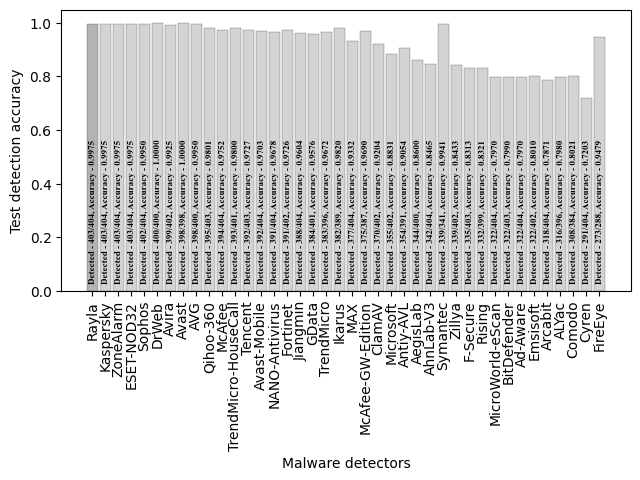

In [23]:
import collections
import operator
import re

malwareDetectors = dict()
negativeMalwareDetectors = dict()
malwareCount = 0
completedFiles = []

malwareName = []
detectorAccuracy = []
detectorNote = []

def IterateMalwares():
    global testList
    global goodwareList
    global malwareDetectors
    global negativeMalwareDetectors
    global malwareCount
    global esetCount

    malFileDirectory = 'Malware-Result/'
    malListFiles = [f for f in listdir(malFileDirectory) if isfile(join(malFileDirectory, f))]

    for files in malListFiles:
        if '.json' in files:
            malListFiles.remove(files)

    goodFileDirectory = 'Goodware-Result/'
    goodListFiles = [f for f in listdir(goodFileDirectory) if isfile(join(goodFileDirectory, f))]

    for files in goodListFiles:
        if '.json' in files:
            goodListFiles.remove(files)

    # All metadata files
    totalList = malListFiles + goodListFiles

    for files in testList:
        esetCount = 0
        finalFileName = ''
        fileDirectory = ''
        isMalware = False

        if not files in goodwareList:
            fileDirectory = 'Malware-Result/'
            if 'VirusShare_' + files + '.txt' in malListFiles:
                finalFileName = 'VirusShare_' + files + '.txt'
            elif 'VirusTotal_' + files + '.txt' in malListFiles:
                finalFileName = 'VirusTotal_' + files + '.txt'
            isMalware = True
        else:
            #continue
            fileDirectory = 'Goodware-Result/'
            finalFileName = 'VirusTotal_' + files + '.txt'
            isMalware = False

        malwareCount += 1
        MalwareDetector(files, fileDirectory, finalFileName, isMalware)

    sortedmalwareDetectors = sorted(malwareDetectors.items(), key=operator.itemgetter(1), reverse=True)
    sortednegativeMalwareDetectors = sorted(negativeMalwareDetectors.items(), key=operator.itemgetter(1), reverse=True)
    return collections.OrderedDict(sortedmalwareDetectors), collections.OrderedDict(sortednegativeMalwareDetectors)

def MalwareDetector(fileName, fileDirectory, finalFileName, isMalware):
    if fileName in completedFiles:
        return
    else:
        completedFiles.append(fileName)

    global malwareDetectors
    global negativeMalwareDetectors
    global esetCount

    if fileName == 'clfsplit' or fileName == 'ksplice-inspect':
        for key in malwareDetectors:
            malwareDetectors[key] += 1
        for key in negativeMalwareDetectors:
            negativeMalwareDetectors[key] += 1
        return

    finalFile = fileDirectory + finalFileName
    with open(finalFile) as fp:
        line = fp.readline()
        while line:
            if 'True' in line or 'False' in line:
                detectorName = line.split()[0]
                detectorResult = line.split()[1]

                if isMalware:
                    if detectorName in malwareDetectors and detectorResult == 'True':
                        malwareDetectors[detectorName] += 1
                    elif not detectorName in malwareDetectors and detectorResult == 'True':
                        malwareDetectors[detectorName] = 1

                    if detectorName in negativeMalwareDetectors:
                        negativeMalwareDetectors[detectorName] += 1
                    elif not detectorName in negativeMalwareDetectors:
                        negativeMalwareDetectors[detectorName] = 1
                else:
                    if detectorName in malwareDetectors and detectorResult == 'False':
                        malwareDetectors[detectorName] += 1
                    elif not detectorName in malwareDetectors and detectorResult == 'False':
                        malwareDetectors[detectorName] = 1

                    if detectorName in negativeMalwareDetectors:
                        negativeMalwareDetectors[detectorName] += 1
                    elif not detectorName in negativeMalwareDetectors:
                        negativeMalwareDetectors[detectorName] = 1

            line = fp.readline()

def PrintResults():
    global malwareName
    global detectorAccuracy
    global detectorNote

    malwareDetected, totalTested = IterateMalwares()
    print('Malware Count: %i' %(malwareCount))
    for key in malwareDetected:
        print('%s : %i/%i \t Accuracy: %.4f' %(key, malwareDetected[key], totalTested[key], (malwareDetected[key]/totalTested[key])))
        malwareName.append(key)
        detectorAccuracy.append((malwareDetected[key]/totalTested[key]))
        note = 'Detected - %i/%i, Accuracy - %.4f'%(malwareDetected[key], totalTested[key], (malwareDetected[key]/totalTested[key]))
        detectorNote.append(note)

PrintResults()


import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

endLimit = 40
malwareName = ['Rayla'] + malwareName
detectorAccuracy = [0.997525] + detectorAccuracy
detectorNote = ['Detected - 403/404, Accuracy - 0.9975'] + detectorNote
colorList = ['dimgray'] + ['darkgray'] * (endLimit - 1)

x = np.arange(len(malwareName[0:endLimit]))
width = 0.8

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
rects1 = ax.bar(x, detectorAccuracy[0:endLimit], width, color=colorList, edgecolor = "black", linewidth=0.3, alpha=0.5)

plt.xticks(x, malwareName, rotation='vertical')
plt.ylabel('Test detection accuracy')
plt.xlabel('Malware detectors')

def autolabel(plt, rects):
    plt.rcParams.update({'font.size': 6.5})
    plt.rcParams.update({'font.weight': 'bold'})
    global detectorNote
    count = 0
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        note = detectorNote[count]
        ax.annotate('{}'.format(note),
                    xy=((rect.get_x() + (rect.get_width()/2))+0.06, 0.01),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation='vertical', color = 'black')
        count += 1

autolabel(plt, rects1)
fig.tight_layout()

plt.savefig("accuracy.pdf", bbox_inches='tight', dpi=400)
plt.savefig("accuracy.png", bbox_inches='tight', dpi=400)
plt.show()